In [2]:
import numpy as np
from typing import Callable, Optional, Tuple

def fixed_point_iteration(
        g_of_p : Callable[[float], float],
        approximation : float,
        tolerance : float = 10e-4,
        max_iterations : int = 100) -> Optional[Tuple[float, Optional[list[float]]]]:

    guesses = []
    guesses.append(approximation)
    for _ in range(max_iterations):
        new_approximation = g_of_p(approximation)
        guesses.append(new_approximation)
        if abs(new_approximation - approximation) < tolerance:
            return new_approximation, guesses
        approximation = new_approximation
    return None




In [3]:
g_of_p = lambda x : (1/2) * np.sqrt(10 - (x ** 3))
approximation = 1.5

fixed_point, guesses = fixed_point_iteration(
    g_of_p = g_of_p, 
    approximation = approximation)

print(guesses)
print(fixed_point)

[1.5, np.float64(1.286953767623375), np.float64(1.4025408035395783), np.float64(1.3454583740232942), np.float64(1.3751702528160383), np.float64(1.360094192761733), np.float64(1.3678469675921328), np.float64(1.3638870038840212), np.float64(1.36591673339004), np.float64(1.364878217193677), np.float64(1.365410061169957)]
1.365410061169957


In [4]:
g_of_p = lambda x : np.cos(x)
approximation = np.pi / 4

fixed_point, guesses = fixed_point_iteration(
    g_of_p = g_of_p,
    approximation = approximation
)

print(guesses)
print(fixed_point)
print(fixed_point.as_integer_ratio())

[0.7853981633974483, np.float64(0.7071067811865476), np.float64(0.7602445970756301), np.float64(0.7246674808891262), np.float64(0.7487198857894842), np.float64(0.7325608445922418), np.float64(0.7434642113152937), np.float64(0.7361282565008519), np.float64(0.7410736870837102), np.float64(0.7377441589925746), np.float64(0.7399877647958709), np.float64(0.7384768087245538), np.float64(0.7394947711319744), np.float64(0.7388091341840698)]
0.7388091341840698
(6654601082818591, 9007199254740992)


Root: nan
Number of iterations: 1000


/tmp/ipykernel_61315/2399699190.py:20: RuntimeWarning: divide by zero encountered in log
  return 4 * np.log(x)
/tmp/ipykernel_61315/2399699190.py:20: RuntimeWarning: invalid value encountered in log
  return 4 * np.log(x)


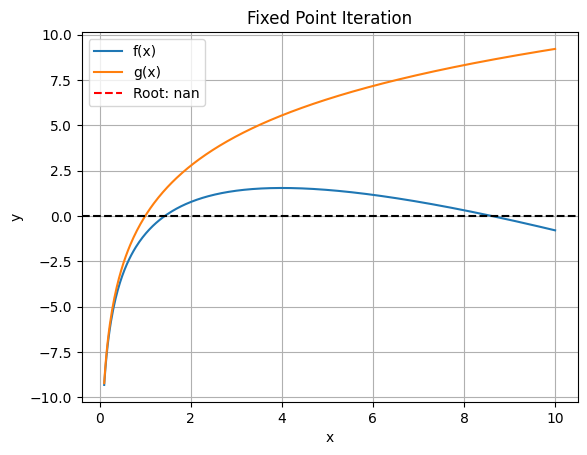

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 4 * np.log(x) - x

def fixed_point_iteration(g, x0, tolerance, max_iterations):
    x = x0
    iterations = 0
    while True:
        x_next = g(x)
        iterations += 1
        if abs(x_next - x) < tolerance or iterations >= max_iterations:
            break
        x = x_next
    return x_next, iterations

#Rearrange f(x) = 0 to x = g(x)  
def g(x):
    return 4 * np.log(x)

x0 = 1  # Initial guess
tolerance = 1e-6
max_iterations = 1000

root, iterations = fixed_point_iteration(g, x0, tolerance, max_iterations)

print(f"Root: {root}")
print(f"Number of iterations: {iterations}")

#Plot
x_vals = np.linspace(0.1, 10, 400)
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.plot(x_vals, g(x_vals), label='g(x)')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=root, color='r', linestyle='--', label=f'Root: {root:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fixed Point Iteration')
plt.legend()
plt.grid(True)
plt.show()
